<a href="https://colab.research.google.com/github/Ishita-Si/BlazeTrack/blob/main/Models/fire_scratch_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d phylake1337/fire-dataset
!unzip -q fire-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/phylake1337/fire-dataset
License(s): CC0-1.0
 93% 361M/387M [00:01<00:00, 322MB/s]
100% 387M/387M [00:01<00:00, 380MB/s]


In [3]:
import os

fire_dir = "fire_dataset/fire_images"
non_fire_dir = "fire_dataset/non_fire_images"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1
)

train_gen = train_datagen.flow_from_directory(
    "fire_dataset/",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    "fire_dataset/",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit( train_gen,validation_data=val_gen,epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7288 - loss: 0.6236 - val_accuracy: 0.8693 - val_loss: 0.2487
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9096 - loss: 0.2198 - val_accuracy: 0.9146 - val_loss: 0.3021
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9396 - loss: 0.1642 - val_accuracy: 0.9296 - val_loss: 0.1725
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9361 - loss: 0.1624 - val_accuracy: 0.9196 - val_loss: 0.1735
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9563 - loss: 0.1377 - val_accuracy: 0.9347 - val_loss: 0.1508
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9304 - loss: 0.1481 - val_accuracy: 0.9347 - val_loss: 0.1665
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9779 - loss: 0.0800 - val_accuracy: 0.9246 - val_loss: 0.2208
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9589 - loss: 0.0866 - val_accuracy: 0.9095 - val_loss:

In [8]:
val_gen.reset()
preds = model.predict(val_gen, verbose=1)
y_pred = (preds > 0.5).astype(int)
y_true = val_gen.classes

print(classification_report(y_true, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 474ms/step
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       151
           1       0.21      0.17      0.19        48

    accuracy                           0.65       199
   macro avg       0.48      0.48      0.48       199
weighted avg       0.62      0.65      0.63       199



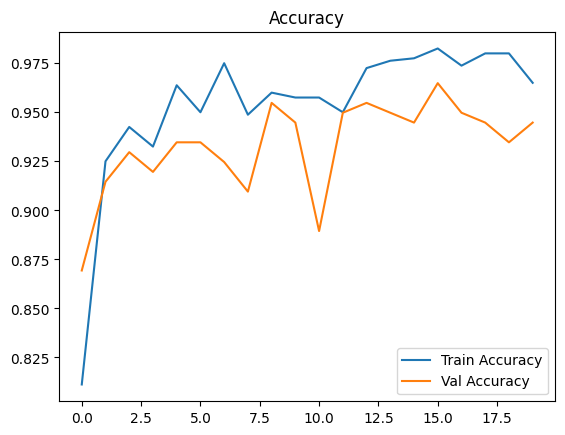

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [10]:
from tensorflow.keras.preprocessing import image

img_path = 'fire_dataset/fire_images/fire.39.png'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]
print("Fire" if prediction < 0.5 else "No Fire")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
No Fire


In [11]:
model.save('fire_detection_model.keras')
